In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv


In [30]:
df = pd.read_csv('/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv')

In [31]:
df.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Video views,5000.0,1.071449e+09,2.003844e+09,75.0,1.862329e+08,482054780.0,1.124368e+09,4.754884e+10


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [34]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [35]:
len(df.Rank.unique())

5000

In [36]:
print(len(df.Grade.unique()))
df.Grade.unique()

6


array(['A++ ', 'A+ ', 'A ', '\xa0 ', 'A- ', 'B+ '], dtype=object)

In [37]:
df.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [38]:
df = df.replace('--', np.nan, regex=True)
df.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [39]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [40]:
perc_missing = df.isnull().sum()*100/len(df)
perc_missing

Rank             0.00
Grade            0.00
Channel name     0.00
Video Uploads    0.12
Subscribers      7.74
Video views      0.00
dtype: float64

<Axes: >

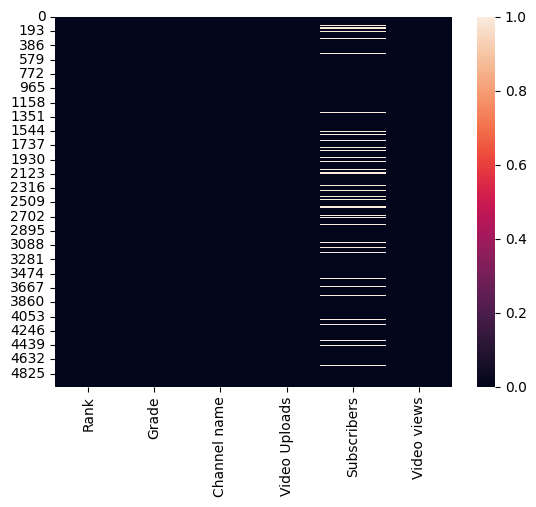

In [41]:
import seaborn as sns
sns.heatmap(df.isnull())

In [42]:
df = df.dropna(axis=0)

<Axes: >

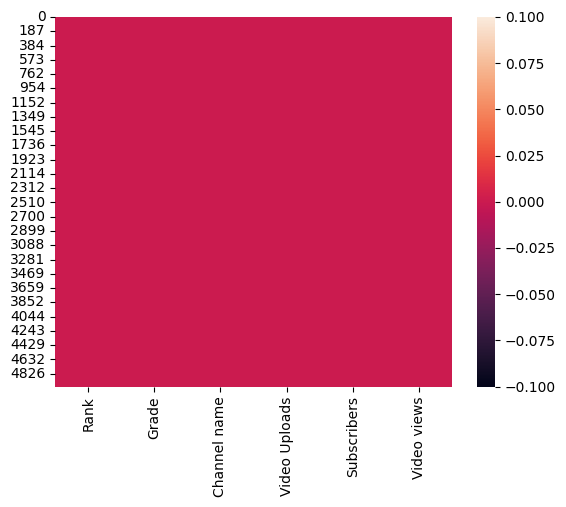

In [43]:
sns.heatmap(df.isnull())

In [44]:
df.Rank.str[0:-2]

0           1
1           2
2           3
3           4
4           5
        ...  
4995    4,996
4996    4,997
4997    4,998
4998    4,999
4999    5,000
Name: Rank, Length: 4610, dtype: object

In [45]:
df.Rank = df.Rank.replace('st','', regex=True)
df.Rank = df.Rank.replace('nd','', regex=True)
df.Rank = df.Rank.replace('rd','', regex=True)
df.Rank = df.Rank.replace('th','', regex=True)
df.Rank = df.Rank.replace(',','', regex=True)

In [46]:
df.Rank

0          1
1          2
2          3
3          4
4          5
        ... 
4995    4996
4996    4997
4997    4998
4998    4999
4999    5000
Name: Rank, Length: 4610, dtype: object

In [47]:
df.Rank = df.Rank.astype('float')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4610 non-null   float64
 1   Grade          4610 non-null   object 
 2   Channel name   4610 non-null   object 
 3   Video Uploads  4610 non-null   object 
 4   Subscribers    4610 non-null   object 
 5   Video views    4610 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 252.1+ KB


In [49]:
df['Video Uploads'] = df['Video Uploads'].astype('float')

In [50]:
df['Subscribers'] = df['Subscribers'].astype('float')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4610 non-null   float64
 1   Grade          4610 non-null   object 
 2   Channel name   4610 non-null   object 
 3   Video Uploads  4610 non-null   float64
 4   Subscribers    4610 non-null   float64
 5   Video views    4610 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 252.1+ KB


In [52]:
df.Grade

0       A++ 
1       A++ 
2       A++ 
3       A++ 
4       A++ 
        ... 
4995     B+ 
4996     B+ 
4997     B+ 
4998     B+ 
4999     B+ 
Name: Grade, Length: 4610, dtype: object

In [53]:
df.Grade.unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [63]:
# Map the grades and handle unmapped values by filling with a default value (e.g., 0)
df['Grade'] = df['Grade'].map({'A++ ': 1, 'A+ ': 2, 'A ': 3, 'A- ': 4, 'B+ ': 5})

In [64]:
df.Grade.dtype

dtype('int64')

In [71]:
# Find Average Views For Each Channel
df['avg_views'] = df['Video views']/df['Video Uploads']
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,new,avg_views
0,1.0,1,Zee TV,82757.0,18752951.0,20869786591,1,2.521815e+05
1,2.0,1,T-Series,12661.0,61196302.0,47548839843,1,3.755536e+06
2,3.0,1,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082,1,2.625551e+07
3,4.0,1,SET India,27323.0,31180559.0,22675948293,1,8.299216e+05
4,5.0,1,WWE,36756.0,32852346.0,26273668433,1,7.148130e+05


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4610 non-null   float64
 1   Grade          4610 non-null   int64  
 2   Channel name   4610 non-null   object 
 3   Video Uploads  4610 non-null   float64
 4   Subscribers    4610 non-null   float64
 5   Video views    4610 non-null   int64  
 6   new            4610 non-null   int64  
 7   avg_views      4610 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 324.1+ KB


In [75]:
# Find Out Top Five Channels With Maximum Number of Video Upload
df.sort_values(by='Video Uploads', ascending = False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,new,avg_views
3453,3454.0,5,AP Archive,422326.0,746325.0,548619569,5,1299.042846
1149,1150.0,4,YTN NEWS,355996.0,820108.0,1640347646,4,4607.769879
2223,2224.0,5,SBS Drama,335521.0,1418619.0,1565758044,5,4666.646928
323,324.0,3,GMA News,269065.0,2599175.0,2786949164,3,10357.902975
2956,2957.0,5,MLB,267649.0,1434206.0,1329206392,5,4966.229622


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4610 non-null   float64
 1   Grade          4610 non-null   int64  
 2   Channel name   4610 non-null   object 
 3   Video Uploads  4610 non-null   float64
 4   Subscribers    4610 non-null   float64
 5   Video views    4610 non-null   int64  
 6   new            4610 non-null   int64  
 7   avg_views      4610 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 324.1+ KB


In [82]:
df1 = df.drop(columns = ['Channel name'])

In [83]:
df1.corr()

,Rank,Grade,Video Uploads,Subscribers,Video views,new,avg_views
Rank,1.000000,0.865083,-0.073180,-0.383329,-0.402873,0.865083,-0.153670
Grade,0.865083,1.000000,-0.088773,-0.429213,-0.477423,1.000000,-0.155231
Video Uploads,-0.073180,-0.088773,1.000000,0.011362,0.087830,-0.088773,-0.064408
Subscribers,-0.383329,-0.429213,0.011362,1.000000,0.791241,-0.429213,0.289386
Video views,-0.402873,-0.477423,0.087830,0.791241,1.000000,-0.477423,0.294422
new,0.865083,1.000000,-0.088773,-0.429213,-0.477423,1.000000,-0.155231
avg_views,-0.153670,-0.155231,-0.064408,0.289386,0.294422,-0.155231,1.000000


In [89]:
# Which Grade Has A Maximum Number of Video Uploads
df.sort_values(by ='Video Uploads', ascending = False)['Grade'].head(1)

3453    5
Name: Grade, dtype: int64

In [90]:
# Which Grade Has The Highest Average Views
df.sort_values(by ='avg_views', ascending = False)['Grade'].head(1)

628    3
Name: Grade, dtype: int64

In [106]:
# Which Grade Has The Highest Number of Subscribers? 
df.sort_values(by ='Subscribers', ascending = False)['Grade'].head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,new,avg_views
1470,1471.0,4,PewDiePie,3601.0,65995310.0,18684630003,4,5.188734e+06


<Axes: xlabel='Grade', ylabel='Subscribers'>

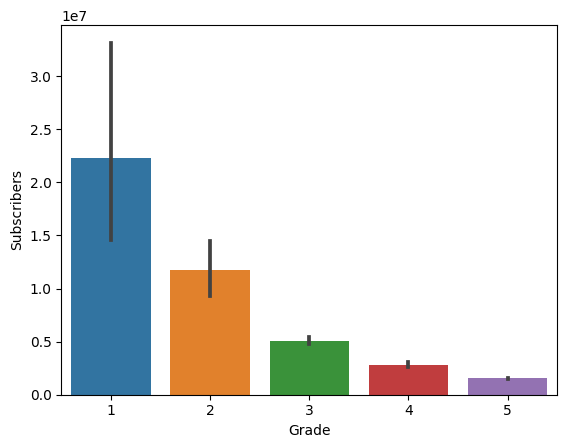

In [105]:
sns.barplot(x='Grade',y='Subscribers',data=df1)

In [92]:
# Which Grade Has The Highest Video Views
df.sort_values(by ='Video views', ascending = False)['Grade'].head(1)

1    1
Name: Grade, dtype: int64

<Axes: xlabel='Grade', ylabel='Video views'>

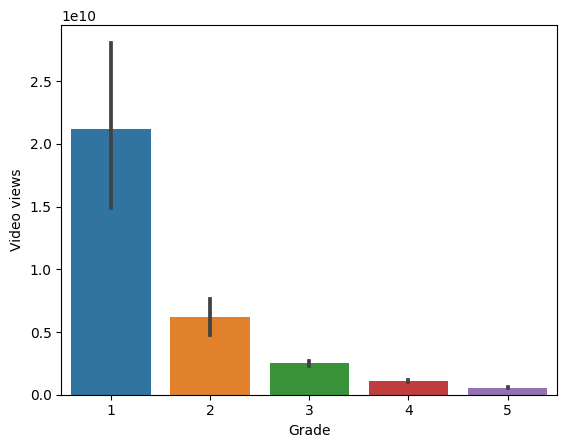

In [103]:
sns.barplot(x='Grade',y='Video views',data=df1)

In [93]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'new', 'avg_views'],
      dtype='object')

<Axes: xlabel='Grade', ylabel='count'>

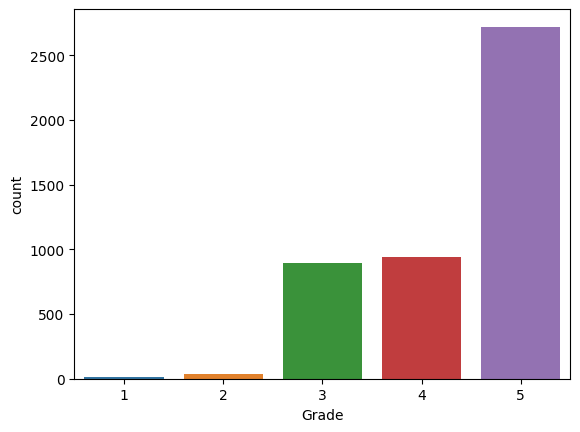

In [100]:
sns.countplot(data=df, x=df['Grade'])

<Axes: xlabel='Grade', ylabel='Video Uploads'>

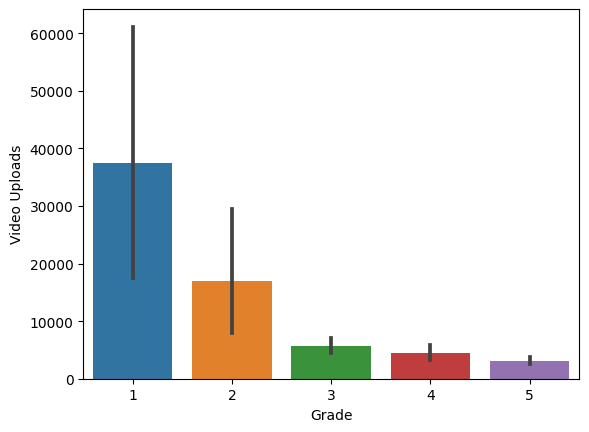

In [102]:
sns.barplot(x='Grade',y='Video Uploads',data=df1)